# 17. One-parameter groups of transformations

This notebook is part of the [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

Let $M$ be a smooth manifold. A **one-parameter group of
transformations $ϕ$, on $M$** is a smooth map  $\phi: M × R\to M$  such that

\begin{equation}
ϕ(x, 0) = x,
\label{}\tag{17.1}
\end{equation}

\begin{equation}
ϕ(ϕ(x, t), s) = ϕ(x, t + s)\quad \mbox{for all } x ∈ M, \ t, s ∈ R.
\label{}\tag{17.2}
\end{equation}

If we put $$ϕ_t (x) = ϕ(x, t),$$ 

then $\phi_t$, for $t\in R$ is a smooth map $M\to M$ and according to (17.2)

$$\displaystyle \phi_{t+s}(x)=\phi(x,t+s)=\phi(\phi(x,t),s)\\=\phi(\phi_t(x),s)=\phi_s(\phi_t(x))=(\phi_s\circ\phi_t)(x),$$
i.e.,

\begin{equation}
ϕ_{t+s} = ϕ_s ◦ ϕ_t = ϕ_t ◦ ϕ_s,
\label{}\tag{17.3}
\end{equation}

since $\ t+s=s+t$.

The map $\phi_0$ is the identity on $M$ since from (17.1) it follows
$ϕ_0 (x) = ϕ(x, 0) = x$ for all $x ∈ M$. From (17.3) it follows $ϕ_t ◦ ϕ_{−t} = ϕ_{−t} ◦ ϕ_t = ϕ_0$ , which means that each map $ϕ_t$ has
an inverse, $ϕ_{−t}$ , which is also smooth. Therefore, each $ϕ_t$ is a diffeomorphism
of $M$ onto itself. Thus, the set of transformations $\{ϕ_t : t ∈ R\}$ is an Abelian **group of
diffeomorphisms of** $M$ onto $M$, and the map $t → ϕ_t$ is a homomorphism from the
additive group of the real numbers into the group of diffeomorphisms of $M$.

<br>

**Example 17.1**

Let us check that the formula
$$\phi((x,y,t)=\frac{(2x,2y\cos t+(1-x^2-y^2)\sin t)}{1+x^2+y^2+(1-x^2-y^2)\cos t-2y\sin t}$$

defines a one-parameter group of transformations i.e., the conditions (17.1), (17.2) are satisfied.

In [2]:
var('t,s,x,y,x0,y0')           # symbolic variables
                               # components ϕ1,ϕ2 of ϕ:
ϕ1(x,y,t)=2*x/(1+x^2+y^2+(1-x^2-y^2)*cos(t)-2*y*sin(t))
ϕ2(x,y,t)=(2*y*cos(t)+(1-x^2-y^2)*sin(t))/(1+x^2+y^2+(1-x^2-y^2)*cos(t)-2*y*sin(t))
                               # ϕ=(ϕ1,ϕ2):
ϕ(x,y,t)=(ϕ1(x,y,t),ϕ2(x,y,t))

First let us check (17.1), i.e. that $ϕ(x,y,t)|_{t=0}=(x,y)$:

In [3]:
ϕ(x,y,t).subs(t=0)             # substitute t by 0 in ϕ

(x, y)

Now check that (17.2) holds for the first component of $ϕ$:

In [4]:
a1=ϕ1(x,y,t+s).trig_expand()   # first comp. of the right hand side of (17.2)
                               # first comp. of the left hand side of (17.2):
b1=ϕ1(ϕ1(x,y,t),ϕ2(x,y,t),s).normalize()
                               # first component of the difference between
                               # the left and right hand side of (17.2) (numerator)
c1=(a1-b1).numerator()         # take numerator of a1-b1
c1.full_simplify()             # simplify

0

and for the second component of $ϕ$:

In [5]:
a2=ϕ2(x,y,t+s).trig_expand()  # second component of the right hand side of (17.2)
                              # second component of the left hand side of (17.2)
b2=ϕ2(ϕ1(x,y,t),ϕ2(x,y,t),s).normalize()
                              # second component of the difference between
                              # the left and right side of (17.2) (numerator):
c2=(a2-b2).numerator()        # take numerator of a2-b2
c2.full_simplify()

0

We have checked the condition (17.2).

<br>

### Infinitesimal generator of $\phi_t$

<br>


Each one-parameter group of transformations $ϕ$ on $M$ defines a family of curves
in $M$. The map $ϕ_x : R → M$ given by $ϕ_x (t) = ϕ(x, t)$ is a
smooth curve in M for each $x ∈ M$. Since $ϕ_x (0) = ϕ(x, 0) = x$, the tangent
vector to the curve $ϕ_x$ at $t = 0$ (defined in (8.9)) belongs to $T_x M$. The **infinitesimal generator of** $ϕ$ is
the vector field $X$ such that 

$$X_x = (ϕ_x )'_0.$$ 

The infinitesimal generator of $ϕ$ is a vector
field tangent to the curves generated by the one-parameter group of transformations.

<br>

**Example 17.2**

Let us compute the infinitesimal generator $X$ of the one-parameter group $\phi_t$ from the previous example in Cartesian coordinates of $R^2$.

In [6]:
# continuation                           according to (8.10)
# the first component of X is the derivative of ϕ1 w.r. to t
X1=diff(ϕ1(x,y,t),t).subs(t=0);X1

x*y

In [7]:
# the second component of X is the derivative of ϕ2 w.r. to t
X2=diff(ϕ2(x,y,t),t).subs(t=0);X2

-1/2*x^2 + 1/2*y^2 + 1/2

In [8]:
X2.numerator_denominator()   # numerator and denominator of X2 

(-x^2 + y^2 + 1, 2)

Thus the infinitesimal generator is 
$\ \ X=xy\frac{\partial}{\partial x}+\frac{-x^2+y^2+1}{2}\frac{\partial}{\partial y}.$

<br>

**Example 17.3**

Plot  the infintesimal generator from the previous example.

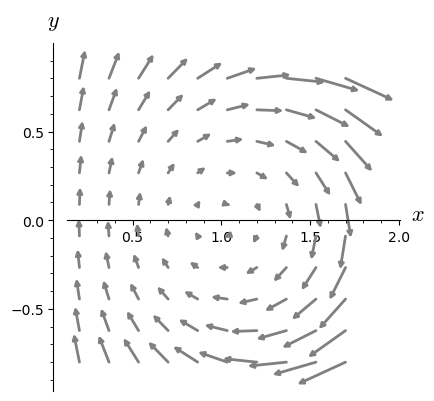

In [9]:
M = Manifold(2, 'M')                      # manifold M=R^2
X.<x,y> = M.chart()                       # Cartesian coordinates 
X = M.vector_field(x*y,(-x^2+y^2+1)/2, name='v') # vector field  
                                          # with components X1,X2
p=X.plot(scale=0.2,arrowsize=1.5,number_values={x:10, y:10},   
    ranges={x: (0.2,1.7), y: (-0.8,0.8)},color='grey') # plot X
p.show(aspect_ratio=1)                    # show plot

<br>

**Example 17.4**


For $ϕ$ from  Example 17.1,
 plot the curves $\phi_{(x,y)}$ for some selected points $(x,y)$, where 
$ϕ_{(x,y)} (t) = ϕ(x,y, t)$. 

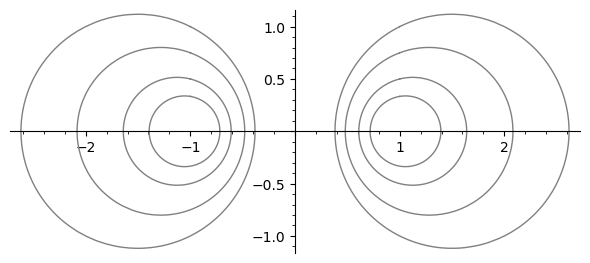

In [10]:
var('t,s,x,y,x0,y0')                   # symbolic variables
                                       # components ϕ1,ϕ2 of ϕ:
ϕ1(x,y,t)=2*x/(1+x^2+y^2+(1-x^2-y^2)*cos(t)-2*y*sin(t))
ϕ2(x,y,t)=(2*y*cos(t)+(1-x^2-y^2)*sin(t))/(1+x^2+y^2+(1-x^2-y^2)*cos(t)-2*y*sin(t))                               
ϕ(x,y,t)=(ϕ1(x,y,t),ϕ2(x,y,t))         # ϕ=(ϕ1,ϕ2):
# plot curves passing through (1,1),(1,1/2),(1,1/3),(1,3/4)
s1=[parametric_plot( ϕ(x,y,t).subs({x:1,y:y0}), (t, 0, 2*pi),color='grey') 
 for y0 in [1,1/2,1/3,3/4]]  
# plot curves passing through (-1,1),(-1,1/2),(-1,1/3),(-1,3/4)
s2=[parametric_plot( ϕ(x,y,t).subs({x:-1,y:y0}), (t, 0, 2*pi),color='grey') 
 for y0 in [1,1/2,1/3,3/4]]
sum(s1)+sum(s2)                       # combine plots

<br>

**Example 17.5**

Check that the formulas
$$\left\{\begin{matrix}
ϕ_1(x,y,t)=x\cos t-y\sin t ,\\
ϕ_2(x,y,t)=x\sin t +y\cos t,
\end{matrix}
\right.
$$

define a one-parameter group of transformations.

In [11]:
forget()
var('t,s,x,y')                 # symbolic variables
ϕ1(x,y,t)=x*cos(t)-y*sin(t)    # component ϕ1
ϕ2(x,y,t)=x*sin(t)+y*cos(t)    # component ϕ2                                
a1=ϕ1(x,y,t+s).trig_expand()   # first components of the right
b1=ϕ1(ϕ1(x,y,t),ϕ2(x,y,t),s)   # and left hand sides of (17.2)

In [12]:
c1=(a1-b1)                     # difference between left and right
c1.full_simplify()             # sides of (17.2)for the first component

0

In [13]:
a2=ϕ2(x,y,t+s).trig_expand()   # second components of the right
b2=ϕ2(ϕ1(x,y,t),ϕ2(x,y,t),s)   # and left hand sides of (17.2)

In [14]:
c2=(a2-b2)                     # difference between left and right
c2.full_simplify()             # hand sides for the second component

0

<br>

**Example 17.6**

Compute components of the infinitesimal  generator $X$ of $\phi_t$ from the previous example. Plot $X$.

In [15]:
# continuation
# the first component of X is the derivative of ϕ1 w.r. to t
X1=diff(ϕ1(x,y,t),t).subs(t=0);X1               # cf. (8.10)

-y

In [16]:
# the second component of X is the derivative of ϕ2 w.r. to t
X2=diff(ϕ2(x,y,t),t).subs(t=0);X2

x

Thus $\ \ X=-y\frac{\partial}{\partial x}+x\frac{\partial}{\partial y}$

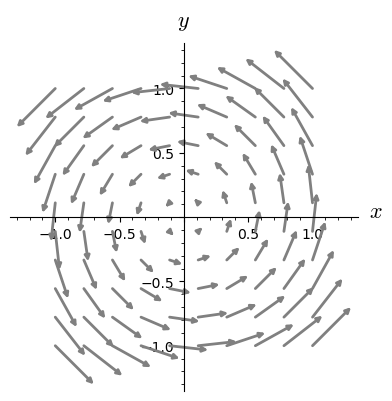

In [17]:
M = Manifold(2, 'M')                  #  manifold M=R^2
X.<x,y> = M.chart()                   # Cartesian coordinates
X = M.vector_field(X1,X2, name='v')   # vector field with comp X1,X2
p=X.plot(scale=0.3,arrowsize=1.5,number_values={x:10, y:10},
    ranges={x: (-1,1), y: (-1,1)},color='grey')    # plot X
p.show(aspect_ratio=1)                # show plot

<br>

**Example 17.7**

For $ϕ$ from Example 17.5
plot the curves $\phi_{(x,y)}$ for some selected points $(x,y)$, where 
$ϕ_{(x,y)} (t) = ϕ(x,y, t)$. 

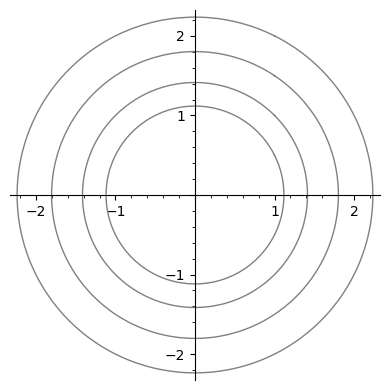

In [18]:
var('t,s,x,y')                       # symbolic variables
ϕ1(x,y,t)=x*cos(t)-y*sin(t)          # component ϕ1
ϕ2(x,y,t)=x*sin(t)+y*cos(t)          # component ϕ2                                
ϕ(x,y,t)=(ϕ1(x,y,t),ϕ2(x,y,t))       # define ϕ=(ϕ1,ϕ2)
# plot curves passing through (1,1),(1,1/2),(1,3/2),(1,2)
s1=[parametric_plot( ϕ(x,y,t).subs({x:1,y:y0}), (t, 0, 2*pi),color='grey') 
 for y0 in [1,1/2,3/2,2]]
sum(s1)                              # combine plots

<br>

**Example 17.8**

Consider $ϕ=(ϕ_1,ϕ_2)$ defined by
$$\left\{\begin{matrix}
ϕ_1(x,y,t)=x+at,\\
ϕ_2(x,y,t)=y+bt,
\end{matrix}
\right.
$$

for fixed $a,b\in R$. Show that $ϕ$ defines a one-parametric group of transformations.

In [19]:
forget()
var('t,s,x,y,a,b')                      # symbolic variables
ϕ1(x,y,t)=x+a*t                         # define ϕ1
ϕ2(x,y,t)=y+b*t                         # define ϕ2

In [20]:
a1=ϕ1(x,y,t+s).expand()                 # right hand side of (17.2) for ϕ1
b1=ϕ1(ϕ1(x,y,t),ϕ2(x,y,t),s).expand()   # left hand side of (17.2) for ϕ1

In [21]:
c1=(a1-b1)                              # difference between lhs and rhs
c1.full_simplify()                      # simplification

0

In [22]:
a2=ϕ2(x,y,t+s).expand()                # right hand side of (17.2) for ϕ2
b2=ϕ2(ϕ1(x,y,t),ϕ2(x,y,t),s).expand()  # left hand side of (17.2) for ϕ2

In [23]:
c2=(a2-b2)                             # difference between lhs and rhs
c2.full_simplify()                     # simplification

0

<br>

**Example 17.9**

Compute components of the infinitesimal  generator $X$ of $\phi_t$ from the previous example for $a=1,\ b=2$.

In [24]:
# continuation
# the first component of X is the derivative of ϕ1 w.r. to t
X1=diff(x+t,t).subs({t:0});
X1

1

In [25]:
# the second component of X is the derivative of ϕ2 w.r. to t
X2=diff(y+2*t,t).subs(t=0);X2

2

Thus $\ \ X=\frac{\partial}{\partial x}+2\frac{\partial}{\partial y}.$


<br>

**Example 17.10**

Plot the vector field $X$ from the previous example.

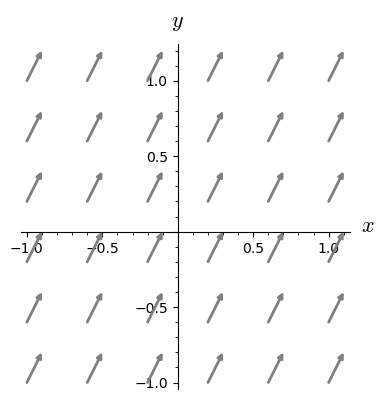

In [26]:
M = Manifold(2, 'M')                    # manifold M
X.<x,y> = M.chart()                     # Cartesian coordinates
X = M.vector_field(1,2, name='v')       # vector field X
p=X.plot(scale=0.1,arrowsize=1.5,number_values={x:6, y:6},
    ranges={x: (-1,1), y: (-1,1)},color='grey')    # plot X
p.show(aspect_ratio=1)                  # show plot

<br>

**Example 17.11**

For $ϕ$ from  Example 17.8
plot the curves $\phi_{(x,y)}$ for some selected points $(x,y)$, where 
$ϕ_{(x,y)} (t) = ϕ(x,y, t)$. 

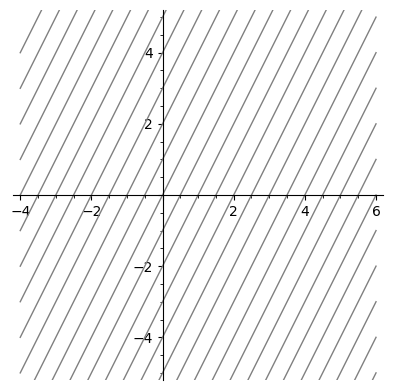

In [27]:
# continuation of Example 17.8
# selected curves ϕ_(x,y) 
ϕ(x,y,t)=(ϕ1(x,y,t).subs(a=1),ϕ2(x,y,t).subs(b=2))   # a=1, b=2
s1=[parametric_plot( ϕ(x,y,t).subs({x:1,y:y0}), 
                    (t,-5,5),ymax=5,ymin=-5,color='grey') 
 for y0 in range(-15,15)]                # x=1,y=-15,-14,...,14
sum(s1).show(aspect_ratio=1)             # combine plots

<br>

**Example 17.12**

Consider $ϕ=(ϕ_1,ϕ_2)$ defined by
$$\left\{\begin{matrix}
ϕ_1(x,y,t)=x\exp(at),\\
ϕ_2(x,y,t)=y\exp(bt),
\end{matrix}
\right.
$$

for fixed $a,b\in R$. Show that $ϕ$ defines a one-parameter group of transformations.

In [28]:
var('t,s,x,y,a,b')                     # symbolic variables
ϕ1(x,y,t)=exp(a*t)*x                   # define ϕ1
ϕ2(x,y,t)=exp(b*t)*y                   # define ϕ2

a1=ϕ1(x,y,t+s).expand()                # right hand side of (17.2) for ϕ1
b1=ϕ1(ϕ1(x,y,t),ϕ2(x,y,t),s).expand()  # left hand side of (17.2) for ϕ1

c1=(a1-b1)                             # difference between lhs and rhs
c1.full_simplify()                     # simplification

0

In [29]:
a2=ϕ2(x,y,t+s).expand()                # right hand side of (17.2) for ϕ2
b2=ϕ2(ϕ1(x,y,t),ϕ2(x,y,t),s).expand()  # left hand side of (17.2) for ϕ2

In [30]:
c2=(a2-b2)                             # difference between lhs and rhs
c2.full_simplify()                     # simplification

0

<br>

**Example 17.13**

Compute components of the infinitesimal  generator $X$ of $\phi_t$ from the previous example for $a=1,\ b=2$.

In [31]:
# first component of X is the derivative of ϕ1 w.r. to t
X1=diff(exp(t)*x,t).subs({t:0});             # cf. (8.10)
X1

x

In [32]:
# second component of X is the derivative of ϕ2 w.r. to t
X2=diff(exp(2*t)*y,t).subs({t:0});
X2

2*y

Thus $\ \ X=x\frac{\partial}{\partial x}+2y\frac{\partial}{\partial y}.$

<br>

**Example 17.14**

Plot the vector field $X$ from the previous example.

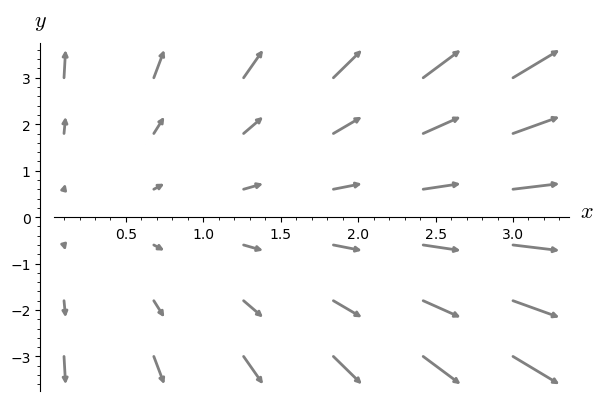

In [33]:
M = Manifold(2, 'M')                      # manifold M=R^2
X.<x,y> = M.chart()                       # Cartesian coordinates
X = M.vector_field(x,2*y, name='v')       # vector field X
p=X.plot(scale=0.1,arrowsize=1.5,number_values={x:6, y:6},
    ranges={x: (0.1,3), y: (-3,3)},color='grey')    # plot X
p.show(aspect_ratio=0.3)                  # show plot

<br>

**Example 17.15**

For $ϕ$ from  Example 17.12
plot the curves $\phi_{(x,y)}$ for some selected points $(x,y)$, where 
$ϕ_{(x,y)} (t) = ϕ(x,y, t)$. 

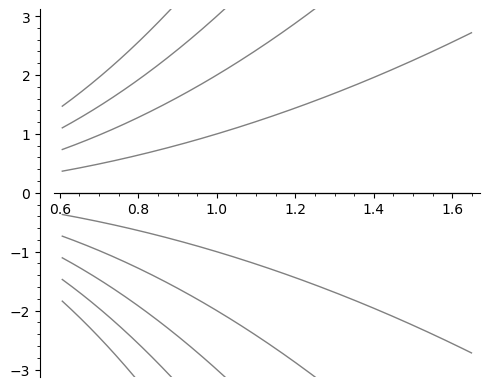

In [34]:
ϕ(x,y,t)=(exp(t)*x,exp(2*t)*y)                    # define ϕ
# plot curves passing through (1,y0), for y0 in [-5,...,4]
s1=[parametric_plot( ϕ(x,y,t).subs({x:1,y:y0}), (t, -0.5,0.5 ),
    color='grey',ymax=3,ymin=-3,aspect_ratio=0.15) 
        for y0 in range(-5,5)]         # x=1, y=-5,-4,...,4
sum(s1)                                # combine plots

## What's next?

Take a look at the notebook [Integral curves](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/18Manifold_Integral_Curves.ipynb).